# Trabalho de Probabilidade e Estatística

---------------------------------

Integrantes:

Bruno Arthur Basso Silva - 22.123.067-5

Gabriela Molina Ciocci - 22.222.032-9

---------------------------------
Tópicos Necessários:

a)	Média, variância, desvio padrão e mediana para x e y.

b)	O histograma de x e y.

c)	O boxplot de x e y.

d)	O coeficiente de correlação de x e y.

e)	Fazer o teste de normalidade para  y e x.

f)	Fazer o gráfico de densidade junto com o histograma para as variáveis x e y.



# - Tratando o Dataset para melhor visualização e análise -

In [24]:
# IMPORTANDO BIBLIOTECAS NECESSÁRIAS PARA FUNCIONAMENTO DO CÓDIGO
import pandas as pd
import numpy as np
from scipy.stats import linregress
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('winequality.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(5)

Número de linhas e colunas: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
# Substitui valores 0 por NaN
data = data.replace('0', np.nan)

# Substitui valores infinitos por NaN
data.replace([np.inf, -np.inf], np.nan)
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
# remove as linhas com NaN
data = data.dropna()
data.head(5)

Número de linhas e colunas: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
# Remove linhas duplicadas
data = data.drop_duplicates()

print("Número de linhas e colunas:",data.shape)
data.head(5)

Número de linhas e colunas: (1359, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


## Analisando cada variável

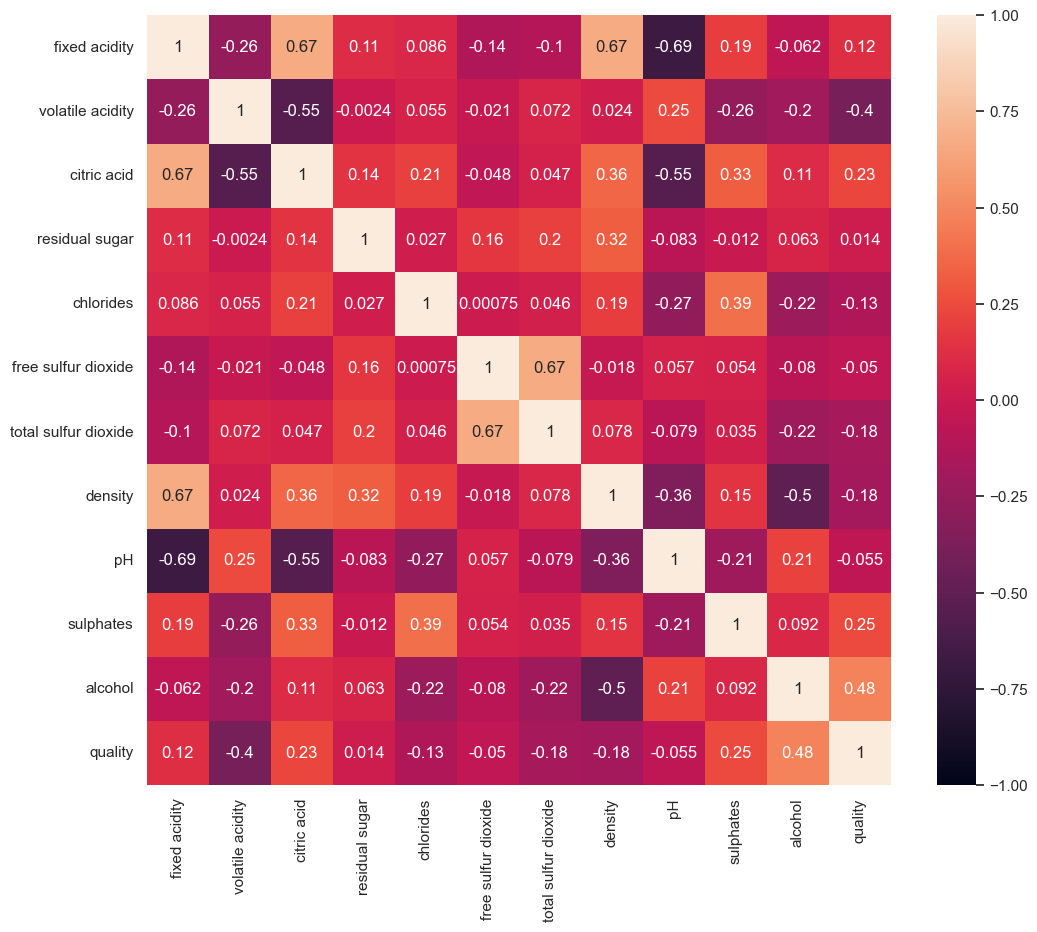

In [18]:
import seaborn as sns
PearsonCorrelation = data.corr("pearson")
SpearmanCorrelation = data.corr("spearman")

sns.set(rc = {'figure.figsize':(12,10)})
PearsonMatrix = sns.heatmap(PearsonCorrelation, vmin=-1, vmax=1, annot=True)


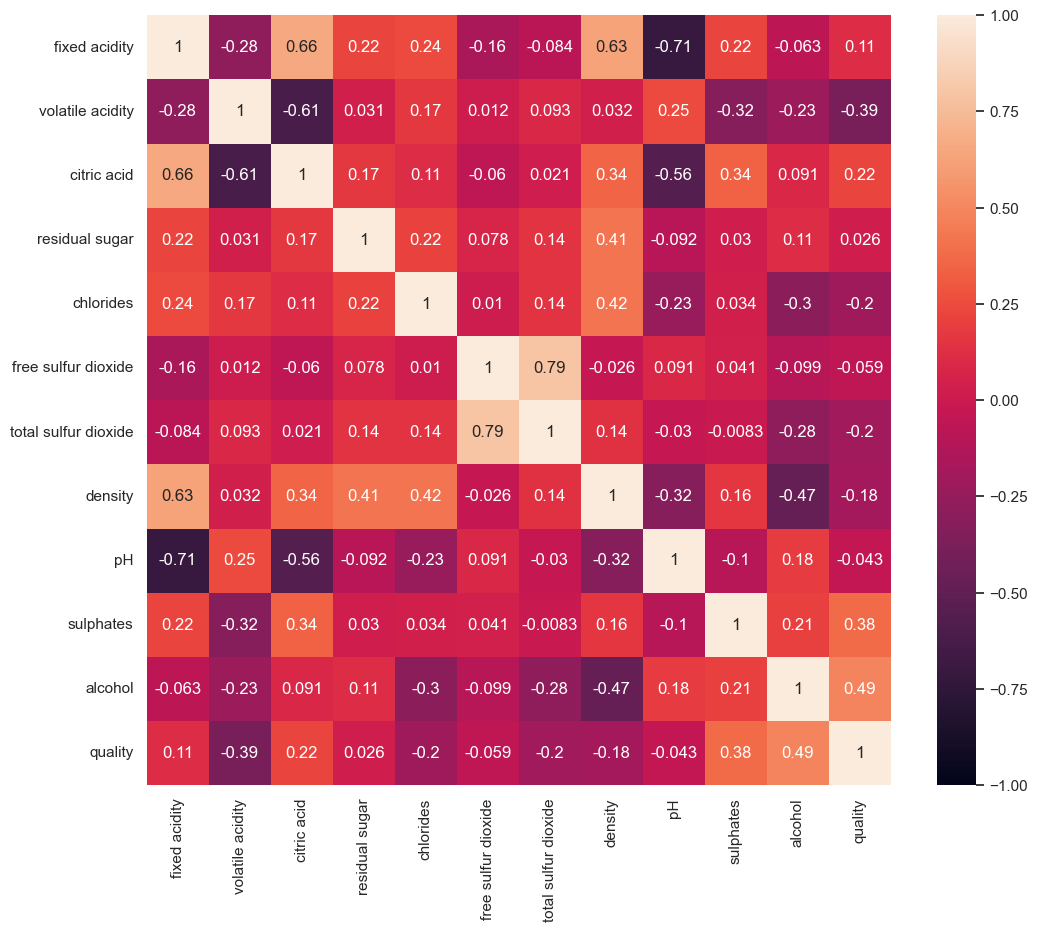

In [19]:
SpearmanMatrix = sns.heatmap(SpearmanCorrelation, vmin=-1, vmax=1, annot=True)

### Possíveis Combinações

1 - Combinação:

Eixo X: total sulfur dioxide 

Eixo Y: free sulfur dioxide

2 - Combinação:

Eixo X: fixed acidity 

Eixo Y: citric acid

3 - Combinação:

Eixo X: fixed acidity 

Eixo Y: density

4 - Combinação:

Eixo X: quality

Eixo Y: alcohol


# A) Calculando os valores

 Média, variância, desvio padrão e mediana para x e y.




In [151]:
# Colunas desejadas
X = data[['total sulfur dioxide', 'fixed acidity', 'quality']]  # Variável X
Y = data[['free sulfur dioxide', 'citric acid', 'density', 'alcohol']]  # Variável Y

# Loop para calcular estatísticas de cada coluna em X e Y
for col_x in X.columns:
    # Cálculos para a coluna em X
    X_media = np.mean(data[col_x])
    X_variancia = np.var(data[col_x])
    X_desvio_padrao = np.std(data[col_x])
    X_mediana = np.median(data[col_x])

    print(f"(X: {col_x}) > Média: {X_media:.2f} -- Variância: {X_variancia:.2f} -- Desvio Padrão: {X_desvio_padrao:.2f} -- Mediana: {X_mediana:.2f}")

print("-----------------------------------------------------------------------------------------------------------")

for col_y in Y.columns:
    # Cálculos para a coluna em Y
    Y_media = np.mean(data[col_y])
    Y_variancia = np.var(data[col_y])
    Y_desvio_padrao = np.std(data[col_y])
    Y_mediana = np.median(data[col_y])

    print(f"(Y: {col_y}) > Média: {Y_media:.2f} -- Variância: {Y_variancia:.2f} -- Desvio Padrão: {Y_desvio_padrao:.2f} -- Mediana: {Y_mediana:.2f}")

(X: total sulfur dioxide) > Média: 46.83 -- Variância: 1115.34 -- Desvio Padrão: 33.40 -- Mediana: 38.00
(X: fixed acidity) > Média: 8.31 -- Variância: 3.01 -- Desvio Padrão: 1.74 -- Mediana: 7.90
(X: quality) > Média: 5.62 -- Variância: 0.68 -- Desvio Padrão: 0.82 -- Mediana: 6.00
-----------------------------------------------------------------------------------------------------------
(Y: free sulfur dioxide) > Média: 15.89 -- Variância: 109.07 -- Desvio Padrão: 10.44 -- Mediana: 14.00
(Y: citric acid) > Média: 0.27 -- Variância: 0.04 -- Desvio Padrão: 0.20 -- Mediana: 0.26
(Y: density) > Média: 1.00 -- Variância: 0.00 -- Desvio Padrão: 0.00 -- Mediana: 1.00
(Y: alcohol) > Média: 10.43 -- Variância: 1.17 -- Desvio Padrão: 1.08 -- Mediana: 10.20


# B) Histograma para entender a dispersão dos dados em cada intervalo

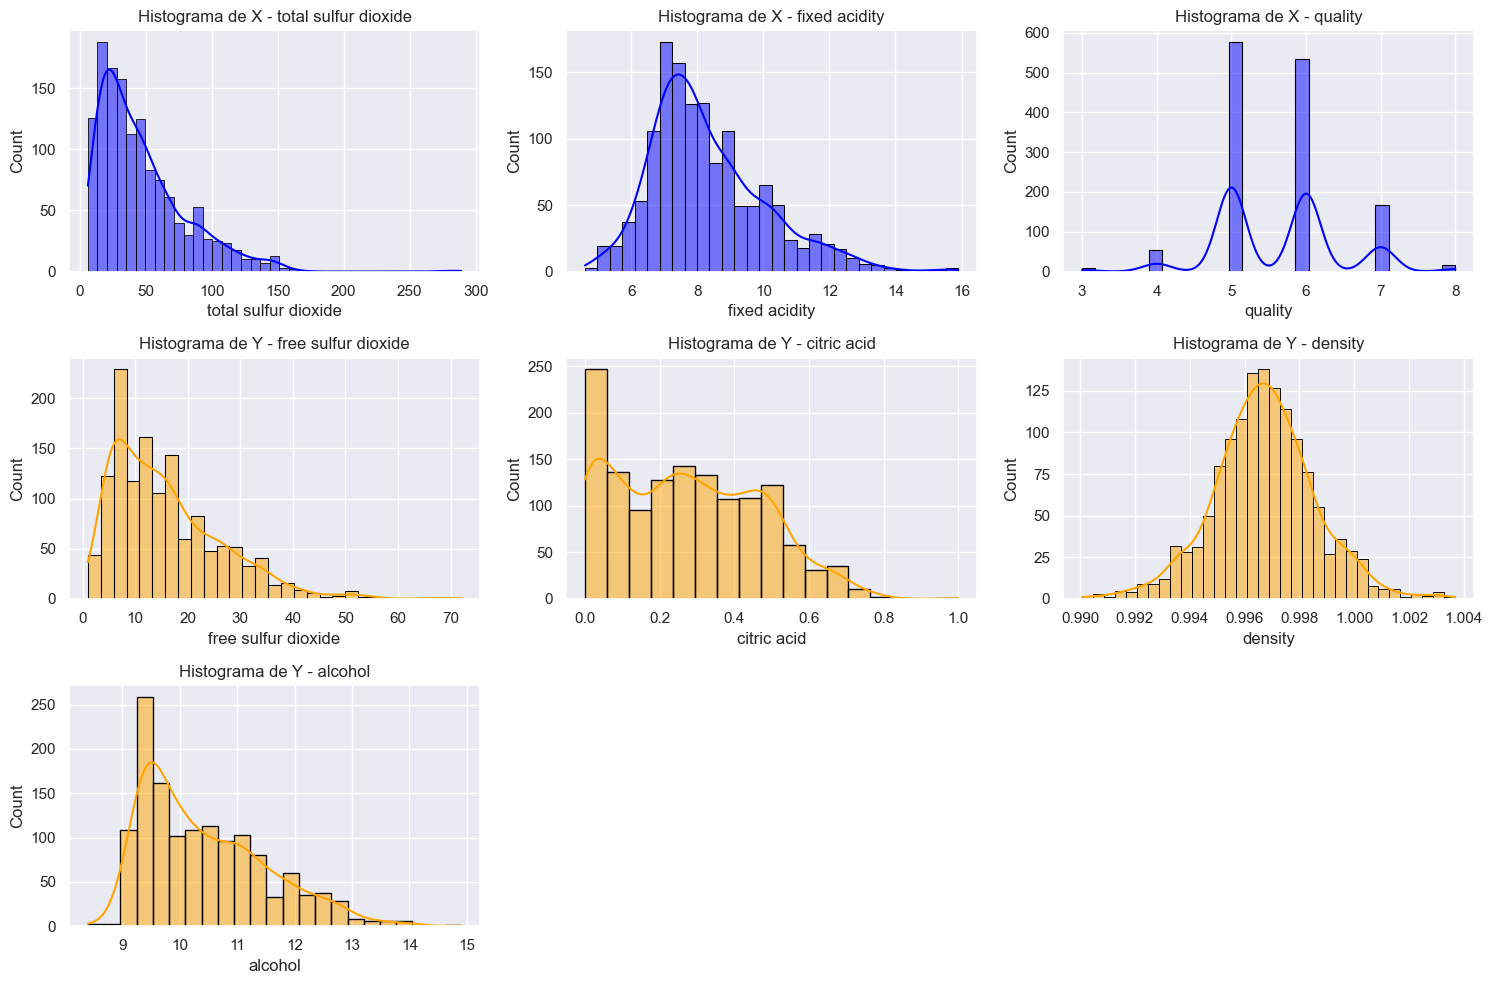

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do tamanho dos gráficos
plt.figure(figsize=(15, 10))

# Histograma para cada coluna de X
for i, col_x in enumerate(X.columns, start=1):
    plt.subplot(3, len(X.columns), i)
    sns.histplot(data[col_x], kde=True, color='blue', edgecolor='black')
    plt.title(f'Histograma de X - {col_x}')

# Histograma para cada coluna de Y
for j, col_y in enumerate(Y.columns, start=1):
    plt.subplot(3, 3, j + len(X.columns))
    sns.histplot(data[col_y], kde=True, color='orange', edgecolor='black')
    plt.title(f'Histograma de Y - {col_y}')

plt.tight_layout()
plt.show()

# C) Box Plot para entender a distribuição dos valores

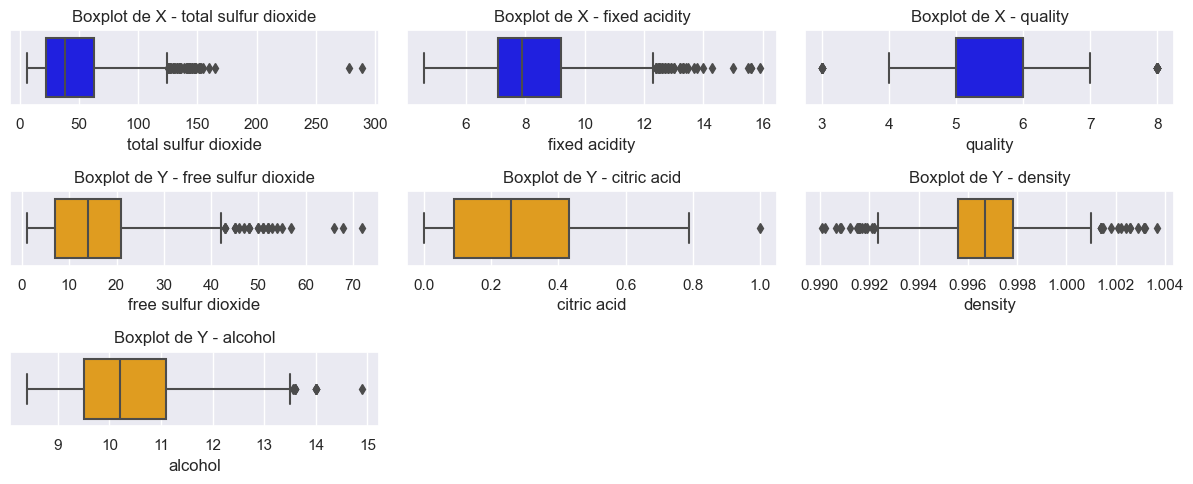

In [162]:
# Boxplot de X e Y
plt.figure(figsize=(12, 5))

# Histograma para cada coluna de X
for i, col_x in enumerate(X.columns, start=1):
    plt.subplot(3, len(X.columns), i)
    sns.boxplot(x=data[col_x], color='blue')
    plt.title(f'Boxplot de X - {col_x}')

# Histograma para cada coluna de Y
for j, col_y in enumerate(Y.columns, start=1):
    plt.subplot(3, 3, j + len(X.columns))
    sns.boxplot(x=data[col_y], color='orange')
    plt.title(f'Boxplot de Y - {col_y}')

plt.tight_layout()
plt.show()

# D) Coeficiente de correlação de X e Y

In [168]:
# Coeficiente de Correlação de Pearson de X e Y

# Loop para calcular o coeficiente de correlação de Pearson entre cada par de variáveis de X e Y
for col_x in X.columns:
    for col_y in Y.columns:
        correlacao_pearson = np.corrcoef(data[col_x], data[col_y])[0, 1]
        print(f"Coeficiente de Correlação de Pearson entre {col_x} e {col_y}: {correlacao_pearson:.4f}")
    print("--------------------------------------------------------------------------------------------------")

# Caso queira ver a lista, somente tirar "[0, 1]" e a quantidade de casa numericas do prinft ":.4f"

Coeficiente de Correlação de Pearson entre total sulfur dioxide e free sulfur dioxide: 0.6672
Coeficiente de Correlação de Pearson entre total sulfur dioxide e citric acid: 0.0474
Coeficiente de Correlação de Pearson entre total sulfur dioxide e density: 0.0781
Coeficiente de Correlação de Pearson entre total sulfur dioxide e alcohol: -0.2178
--------------------------------------------------------------------------------------------------
Coeficiente de Correlação de Pearson entre fixed acidity e free sulfur dioxide: -0.1406
Coeficiente de Correlação de Pearson entre fixed acidity e citric acid: 0.6674
Coeficiente de Correlação de Pearson entre fixed acidity e density: 0.6702
Coeficiente de Correlação de Pearson entre fixed acidity e alcohol: -0.0616
--------------------------------------------------------------------------------------------------
Coeficiente de Correlação de Pearson entre quality e free sulfur dioxide: -0.0505
Coeficiente de Correlação de Pearson entre quality e citr

# E) Teste de Normalidade de X e Y

In [172]:
from scipy.stats import shapiro

# O p-valor representa a probabilidade de observar os dados assumindo que a hipótese nula é verdadeira, ou seja, 
# assumindo que os dados seguem uma distribuição normal.

# -------- VERIFICAÇÃO DO RESULTADO --------
# Um p-valor maior que 0,05 indica que não há evidências suficientes para rejeitar a hipótese nula, sugerindo 
# que os dados podem ser considerados normais.

# E se for menor ou igual a 0,05 indica evidências contra a normalidade, sugerindo que os dados não seguem uma 
# distribuição normal.

# Teste de normalidade para cada coluna de X
print("|------------- TESTES DE NORMALIDADE -------------|\n")

# Para cada coluna de X
for col_x in X.columns:
    stat_X, p_valor_X = shapiro(data[col_x])
    print(f"                      (X) - {col_x}")
    print(f"Estatística -> {stat_X:.3f} |--| p-valor -> {p_valor_X:.3f}")
    
    # Verificação do resultado para X
    if p_valor_X > alpha:
        print("Segue uma distribuição normal, p-valor > 0.05.")
        print("-> Amostra Gaussiana (aceita H0)")
    else:
        print("Não segue uma distribuição normal, p-valor <= 0.05.")
        print("-> Amostra Não Gaussiana (rejeita H0)")
    print("---------------------------------------------------")

# Teste de normalidade para cada coluna de Y
for col_y in Y.columns:
    stat_Y, p_valor_Y = shapiro(data[col_y])
    print(f"                      (Y) - {col_y}")
    print(f"Estatística -> {stat_Y:.3f} |--| p-valor -> {p_valor_Y:.3f}")
    
    # Verificação do resultado para Y
    if p_valor_Y > alpha:
        print("Segue uma distribuição normal, p-valor > 0.05.")
        print("-> Amostra Gaussiana (aceita H0)\n")
    else:
        print("Não segue uma distribuição normal, p-valor <= 0.05.")
        print("-> Amostra Não Gaussiana (rejeita H0)\n")
    print("---------------------------------------------------")

|------------- TESTES DE NORMALIDADE -------------|

                      (X) - total sulfur dioxide
Estatística -> 0.872 |--| p-valor -> 0.000
Não segue uma distribuição normal, p-valor <= 0.05.
-> Amostra Não Gaussiana (rejeita H0)
---------------------------------------------------
                      (X) - fixed acidity
Estatística -> 0.947 |--| p-valor -> 0.000
Não segue uma distribuição normal, p-valor <= 0.05.
-> Amostra Não Gaussiana (rejeita H0)
---------------------------------------------------
                      (X) - quality
Estatística -> 0.864 |--| p-valor -> 0.000
Não segue uma distribuição normal, p-valor <= 0.05.
-> Amostra Não Gaussiana (rejeita H0)
---------------------------------------------------
                      (Y) - free sulfur dioxide
Estatística -> 0.903 |--| p-valor -> 0.000
Não segue uma distribuição normal, p-valor <= 0.05.
-> Amostra Não Gaussiana (rejeita H0)

---------------------------------------------------
                      (Y) - cit

# F) Gráfico de Densidade e Histograma para X e Y

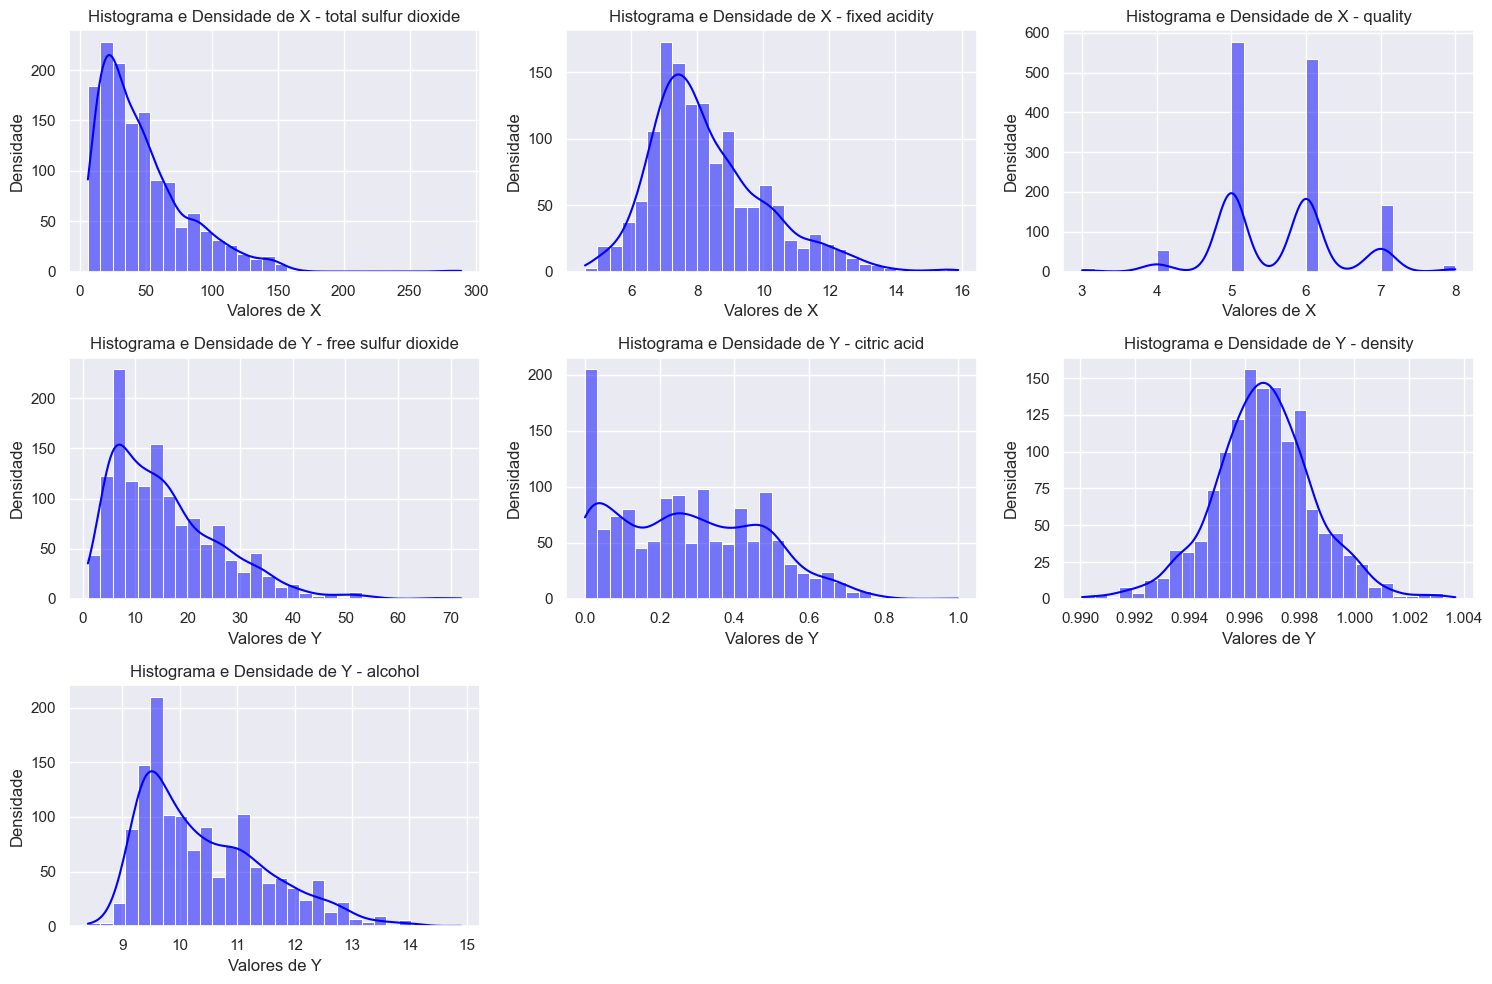

In [176]:
# Gráfico de densidade e histograma para X e Y
# Configuração do tamanho dos gráficos
plt.figure(figsize=(15, 10))

# Histograma para cada coluna de X com Curva de Densidade
for i, col_x in enumerate(X.columns, start=1):
    plt.subplot(3, len(X.columns), i)
    sns.histplot(data[col_x], bins=30, kde=True, color='blue')
    plt.title(f'Histograma e Densidade de X - {col_x}')
    plt.xlabel('Valores de X')
    plt.ylabel('Densidade')

# Histograma para cada coluna de Y com Curva de Densidade
for j, col_y in enumerate(Y.columns, start=1):
    plt.subplot(3, 3, j + len(X.columns))
    sns.histplot(data[col_y], bins=30, kde=True, color='blue')
    plt.title(f'Histograma e Densidade de Y - {col_y}')
    plt.xlabel('Valores de Y')
    plt.ylabel('Densidade')

plt.tight_layout()
plt.show()
